# COMP47700 Speech and Audio PL2: Audio Processing in Python


## Learning Outcomes
The aim of this tutorial is to build on the basic audio processing in Python from lab sheet 1 and to continue to familiarise yourself with the libraries and concepts introduced in the lectures.

This practical tutorial covers the following learning outcomes within the COMP47700 Speech and Audio module:
* Analyse speech and audio signals and features **[LO1]**
  * Develop the ability to handle audio data in Python, including importing, manipulating, and managing various audio formats

* Create programmes to conduct experiments on speech and audio samples building on third-party software libraries **[LO6]**
  * Attain proficiency in generating sound in Python, exploring techniques and tools to create custom audio signals for diverse applications.
  * Master the visualization of audio data in different domains, including time (Waveform), frequency (Spectrum), and time-frequency (Spectrogram/STFT), utilizing Python tools like librosa, scipy, and numpy for effective frequency domain visualization.


## Module Topics
* Basic audio processing (Unit 2, Unit 3)

## Why Is It Important?
Mastering fundamental audio processing techniques is essential for seamlessly grasping advanced concepts covered later in this module. Whenever you manipulate or generate audio, visualization and normalization in both the time and frequency domains become indispensable. Processing audio using libraries like librosa or scipy is imperative. Proficiency in these fundamental concepts in Python is critical for effectively addressing advanced audio topics such as audio quality, degradation, machine learning pipelines, and is essential for success in the module project.

## Structure of this tutorial
This practical tutorial contains different sections:
* **Live coding:** Basic theory, demos and coding examples presented by the lecturer on site (unmarked)
* **Student activity:** Familiarisation and coding exercises to be completed by the students and followed by a short discussion on site (unmarked). These activities introduce key concepts and skills necessary to complete the assignments.
* **Assignment:** Three (3) take home problem/coding questions to be completed by the students and due in two (2) weeks from the day the practical tutorial is given. Assignment questions represent fifteen (15) mark points.

>[COMP47700 Speech and Audio PL2: Audio Processing in Python](#scrollTo=oIY9p4hcjGr4)

>>[Learning Outcomes](#scrollTo=IvNfIDiAInTf)

>>[Module Topics](#scrollTo=IvNfIDiAInTf)

>>[Why Is It Important?](#scrollTo=IvNfIDiAInTf)

>>[Structure of this tutorial](#scrollTo=IvNfIDiAInTf)

>[DTMF frequency grid](#scrollTo=eh_V8MseInTi)

>>[Live Coding: Sine wave generation](#scrollTo=xL9BQTMeInTk)

>>[Student Activity: Sine wave generation and mixing](#scrollTo=UmJ1wBuGInTl)

>>[Live Coding: Fast Fourier Transform (FFT)](#scrollTo=jG33XS82InTn)

>>[Student Activity: Mystery DTMF Number](#scrollTo=q2S-0PB-InTo)

>[Assignment](#scrollTo=agC5K-cDInTq)

>>>[Part 1 [5pt]](#scrollTo=vnH6AR45rQnG)

>>>[Part 2 [8pt]](#scrollTo=V45Wxc-0qfKi)

>>>[Part 3 [2pt]](#scrollTo=Tg7HnV2Lo3JR)

>[Solution](#scrollTo=9RjwklahtGa0)

>>>[Part 1 [5pt]](#scrollTo=enN1ziiQ6Ywl)

>>>[Part 2 [8pt]](#scrollTo=tCF0DAcR6bot)

>>>[Part 3 [2pt]](#scrollTo=2yjXqfvi7V8r)



### **Live coding:** Uploading files from local system
We will upload and extract the content from the zip file provided with the assigment (Brightspace -> Assignment Questions PL1).
1. Import the library `files` from Google Colab
2. From your local system, select the .zip file provided for PL2 (`PL2_files.zip`)
3. Using the `zipfile` library, extract the files to your Google Colab environment (`./PL2_files/`).

In [1]:
from google.colab import files
zipname = 'PL2_files.zip'
uploaded = files.upload()

Saving PL2_files.zip to PL2_files.zip


In [2]:
import zipfile
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
  zip_ref.extractall()  # Extract all files to the current directory



# DTMF frequency grid

[Dual-tone multi-frequency signaling (DTMF)](https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling) was used to send information signals over the voice frequency bands on a telephone system. This means that both voice and dual tones are sent over the same channel.
While it is no longer in general use, you still hear it for some automatic information systems (e.g. telephone banking or service centres). These simple signals are interesting for introducing audio processing concepts.

The 4x4 matrix shows the frequencies to combine to create the sound for each key, e.g. to create the tone for a 4, a 770 Hz tone is combined with a 1209 Hz tone.

|        | 1209 Hz | 1336 Hz | 1477 Hz | 1633 Hz |
|--------|---------|---------|---------|---------|
| 697 Hz | 1       | 2       | 3       | A       |
| 770 Hz | 4       | 5       | 6       | B       |
| 852 Hz | 7       | 8       | 9       | C       |
| 941 Hz | *       | 0       | #       | D       |

Sine wave signals were used in the number dialling on touch-tone phones. They use a dual-tone multi-frequency DTMF system to encode the number dialled for transmission across the telephone network as an auditory signal. DTMF is also used in automated telephone service menu systems.


Each key-press on the telephone keypad generates the sum of two tones expressed as

\begin{equation}
x(n)=cos(2\pi f_{1} nT) + cos(2\pi f_{2} nT)
\end{equation}

where $T$ is the sampling period  and the two frequencies $f_{1}$ and $f_{2}$ combine together to give a unique encoding for each digit on the keypad. The frequencies used are shown in the table above.


In [3]:
#Imports and Magic
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import urllib.request as urllib2
%matplotlib inline

## **Live Coding**: Sine wave generation

1. With a sampling frequency of 16 kHz, create a sin wave with a 770 Hz frequency and 0.25 amplitude.
2. Plot the 0.02 seconds of the wave and play it.

16000


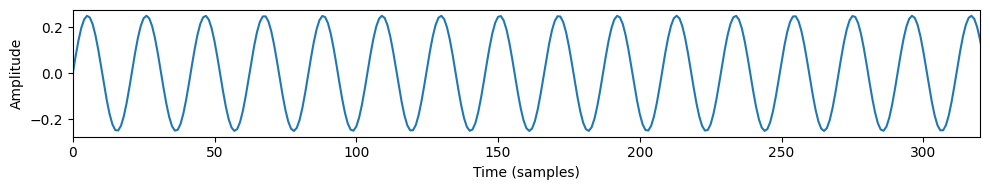

In [4]:
# Sampling frequency
sr = 16000

# Amplitude
A = 0.25

# Frequency (Hertz)
f = 770

# Angular frequency (Radians)
w = 2*np.pi*f

# Duration of the signal (secs) - The signal needs to have a finite duration!
T = 1

# Time samples
t = np.arange(0, T, 1/sr)

# Create sine wave
s1 = A * np.sin(w*t)

# Plot signal
plt.figure(figsize=(10,2))
plt.plot(s1)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Play signal
ipd.Audio(s1, rate=sr)
print(s1.size)

## **Student Activity**: Sine wave generation and mixing
1. Create a second signal but this time with a frequency of 1209 Hz.
2. Add it to your first signal and plot and play the 3 waves: sine wave 770 Hz, sine wave 1209 Hz, and the sum.

**Question:** What number have you generated?

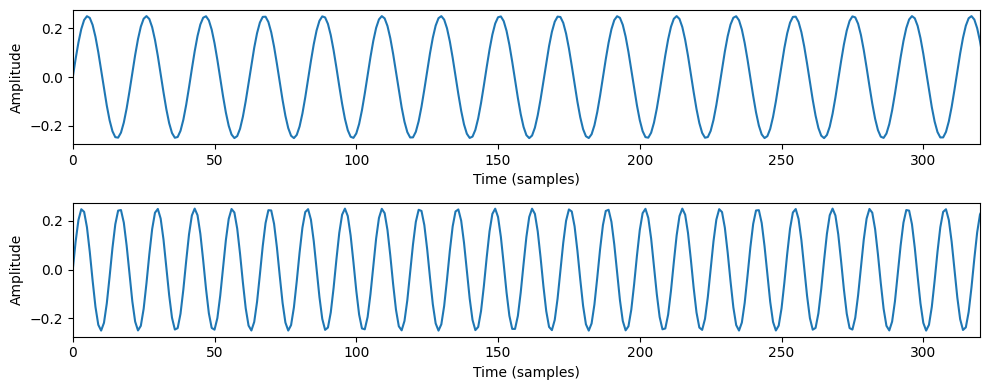

In [5]:
# Amplitude
A = 0.25

# Frequency
f = 1209

# Frequency in Radians
w = 2*np.pi*f

# Create sine wave
s2 = A*np.sin(w*t)

# Plot
plt.figure(figsize=(10,4))

# Subplot 1
plt.subplot(2,1,1)
plt.plot(s1)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Subplot 2
plt.subplot(2,1,2)
plt.plot(s2)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Player
ipd.Audio(s2, rate=sr)

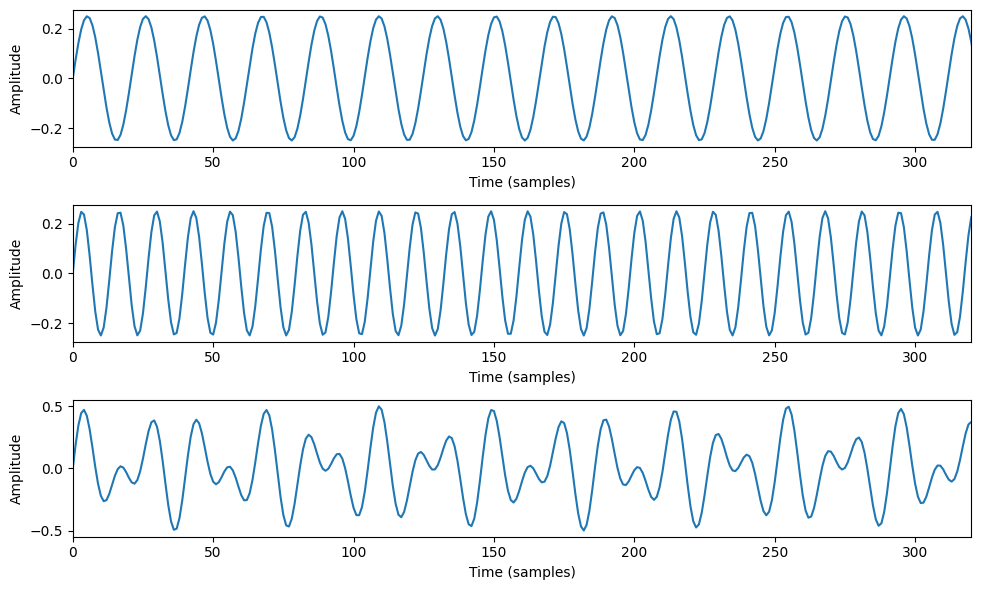

In [6]:
# Mix sine waves (create key press tone)
s_mix=s1+s2

# Plot mixed signal
plt.figure(figsize=(10,6))

# Subplot 1 (s1)
plt.subplot(3,1,1)
plt.plot(s1)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Subplot 2 (s2)
plt.subplot(3,1,2)
plt.plot(s2)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Subplot 3 (s_mix)
plt.subplot(3,1,3)
plt.plot(s_mix)
plt.xlim([0, 0.02*sr])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Play all signals
ipd.display(ipd.Audio(s1, rate=sr))
ipd.display(ipd.Audio(s2, rate=sr))
ipd.display(ipd.Audio(s_mix, rate=sr))

## **Live Coding**: Fast Fourier Transform (FFT)

Computing a FFT to look at the signal in the frequency domain and see what tones are in the signal.

There are lots of ways of doing this, e.g.: `numpy.fft.rfft`, `scipy.fftpack.fftfreq`, `librosa.piptrack`


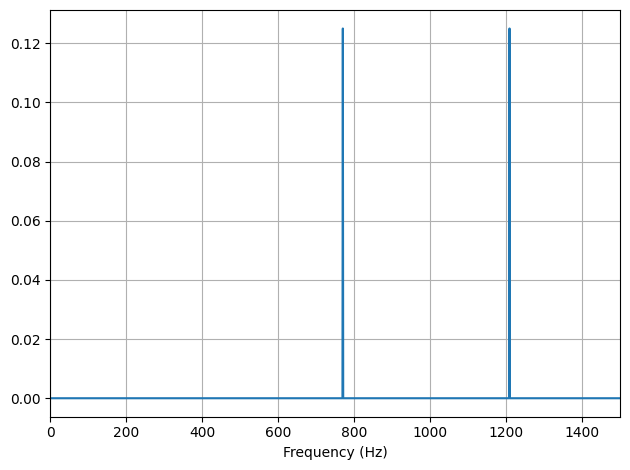

In [7]:
from scipy import fftpack

# Sampling frequencies
sr = 16000

# DFT length
N = len(t)

# Compute DFT using FFT
X = fftpack.fft(s_mix, n=N)

# Plot DFT
# fftfreq (window_length, sample spacing) -> sampling frequencies
# If we pass 1/sr as sample spacing the returned sampling frequencies will be in cycles/seconds (i.e. Hertz)
# If we pass 1 as sample spacing the returned sampling frequencies will be in cycles per unit, in this case we
# need to multiply by the sampling rate to get the same result i.e. the sampling frequencies in Hertz

# Calculate sampling frequencies
sampling_frequencies = fftpack.fftfreq(N, d=1/sr)

# Plot DFT
plt.plot(sampling_frequencies[:N//2], np.abs(X)[:N//2]/N)
plt.xlim(0, 1500);
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 32.]),
 array([ 769.73821318,  813.70330761,  857.66840204,  901.63349647,
         945.59859089,  989.56368532, 1033.52877975, 1077.49387418,
        1121.4589686 , 1165.42406303, 1209.38915746]),
 <BarContainer object of 10 artists>)

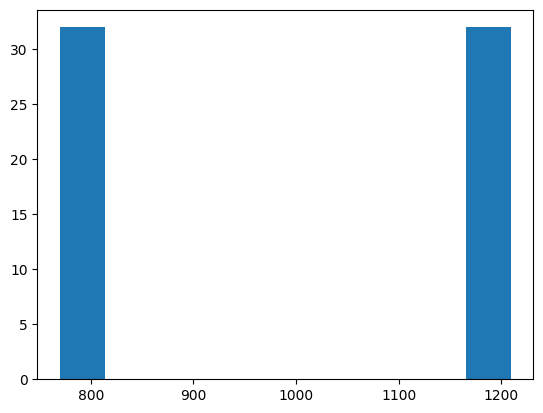

In [8]:
# Now let us do the same with librosa.piptrack (alternative method)
# Extract frequencies -> [n,t] where n is the number of FFT points divided by 2 and t is the number of time frames
frequencies, _ = librosa.piptrack(y=s_mix, sr=16000, n_fft=2048)

# Take all the valid frequencies (i.e. that are not zero)
freqs=frequencies[frequencies>0].flatten()

# Plot histogram
plt.hist(freqs)

## **Student Activity**: Mystery DTMF Number

Utilise the audio processing libraries previously covered to analyze and decode the DTMF number from the provided audio file. Accomplish this by generating and examining its spectrogram.


In [9]:
# URL and filename
f_dtmf = 'dtmfnumbers.wav'

# Play DTMF signal
ipd.Audio(filename = f_dtmf) # load a local WAV file

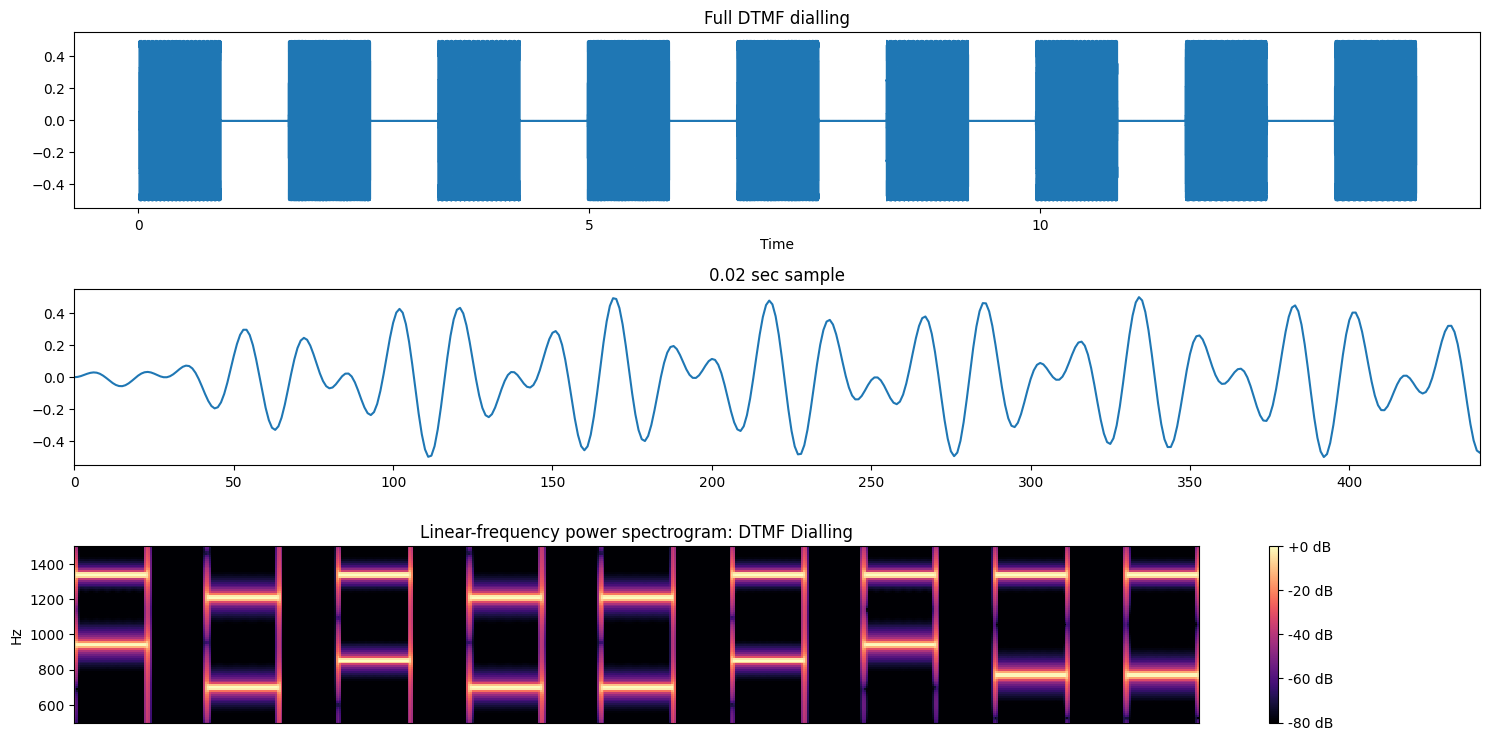

In [10]:
# Load audio file
y_dtmf, sr = librosa.load(f_dtmf)

# Create figure
plt.figure(figsize=(15, 10))

# Subplot 1 (plot waveform)
plt.subplot(4, 1, 1)
librosa.display.waveshow(y_dtmf, sr=sr)
plt.title('Full DTMF dialling')

# Subplot 2 (plot a subset of the samples)
plt.subplot(4, 1, 2)
plt.plot(y_dtmf)
plt.xlim((0, 0.02*sr))
plt.title('0.02 sec sample')

# Plot magnitude spectrogram
plt.subplot(4, 1, 3)
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y_dtmf,n_fft=2048)),  ref=np.max)
librosa.display.specshow(D1, y_axis='linear')
plt.ylim((500,1500))
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram: DTMF Dialling')
plt.tight_layout()

# **Assignment**

Submit a notebook via brightspace demoing how to:

### **Part 1 [5pt]**
Create a function to turn a phone number into a DTMF wav file

In [11]:
import soundfile as sf

# numbers and correlating frequency pairs
phone_freqs = {
    '1': (697, 1209), '2': (697, 1336), '3': (697, 1477), 'A': (697, 1633),
    '4': (770, 1209), '5': (770, 1336), '6': (770, 1477), 'B': (770, 1633),
    '7': (852, 1209), '8': (852, 1336), '9': (852, 1477), 'C': (852, 1633),
    '*': (941, 1209), '0': (941, 1336), '#': (941, 1477), 'D': (941, 1633)
}

# function to turn phone number into a DTMF wav file
def phone_to_DTMFwav(phone_number, filename):

  sr = 16000 # sampling rate
  duration = 1 # duration in sec
  time = np.arange(0, duration, 1/sr) # start at 0, end at 1, in steps of 1/sr
  signal_array = np.zeros(0) # initalizing signal array with 0s
  amplitude = 0.25 # amplitude

  # for each number from input, if number in phone_freq then add its corresponding frequency and create signal
  for number in phone_number:
    if number in phone_freqs:
      freq_pair = phone_freqs[number] # numbers frequency pair
      sound = (amplitude*np.sin(2*np.pi*freq_pair[0]*time)) + (amplitude*np.sin(2*np.pi*freq_pair[1]*time)) # sound calculated
      signal_array = np.append(signal_array, sound)
      # adding pause between each sound
      pause = 8000 # half of sr
      pause = np.zeros(pause)
      signal_array = np.append(signal_array, pause)


  sf.write(filename, signal_array, sr)

Testing:

In [12]:
phone_to_DTMFwav("0864773130", "seans_phone.wav")

In [13]:
phone = 'seans_phone.wav'

# Play DTMF signal
ipd.Audio(filename = phone) # load a local WAV file

### **Part 2 [8pt]**

Create a function to decode a DTMF number (or more generally numbers). The objective of this function is to process the transmitted dual-tone audio and transform it into a sequence of readable numbers. (5pt)

In [18]:
from scipy.signal import find_peaks

def decodeDTMF(filename):

    # extract signal and sr
    signal, sr = librosa.load(filename)
    parts = 10 # how many parts to divide signal into

    total_duration = len(signal)/sr # total duration
    segment_duration = total_duration/parts # each segments duration
    segment_length = int(segment_duration*sr) # length of each segment

    segments = [] # segment list
    decoded_numbers = "" # decoded number to be printed at the end

    # extracting segments and adding them to the list segments
    for i in range(0, len(signal), segment_length):
      segment = signal[i:i+segment_length]
      segments.append(segment)

    # for each segment extracting the frequencys and finding the corresponding number
    for segment in segments:
      X = fftpack.fft(segment, n=N) # compute DFT using FFT
      sampling_frequencies = fftpack.fftfreq(N, d=1/sr) # calculate sampling frequencies

      # getting the two highest peak frequencies
      peak_indexs = np.argsort(np.abs(X)[:N//2])[-2:] # indexs of the two highest peaks
      peak_frequencies = sampling_frequencies[:N//2][peak_indexs] # frequencies corresponding to the two highest peaks

      # if the freq pair (give or take 1) is in phone_freqs then print its number
      for number, (freq1, freq2) in phone_freqs.items():
          if(abs(freq1 - peak_frequencies[0]) <= 1 and abs(freq2 - peak_frequencies[1]) <= 1) or (abs(freq1 - peak_frequencies[1]) <= 1 and abs(freq2 - peak_frequencies[0]) <= 1):
            decoded_numbers += number

    print(decoded_numbers)

decodeDTMF("seans_phone.wav")

0864773130


### **Part 3 [2pt]**
What is the phone number in the example dtmfnumber.wav?

In [15]:
decodeDTMF("dtmfnumbers.wav")

018118055
